# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:140%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **COTTON LEAF IMAGE CLASSIFICATION** 🌾💮🍃 

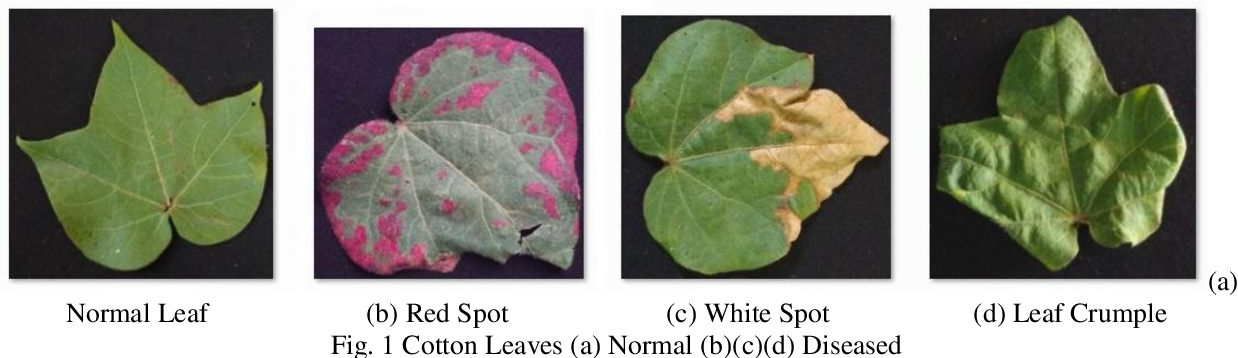

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:140%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **IMPORTING LIBRARIES** 📚 

In [13]:
%%time

import os, random
import numpy as np
import pandas as pd
import imghdr

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'cv2'

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:140%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **REMOVING FILES OTHER THAN IMAGES** 🎬 

In [14]:
%%time

image_types= ['jpeg','png', 'jpg']
for root, dirs, files in os.walk('/kaggle/input/cotton-disease-dataset/Cotton Disease/train'):
    for file in files:
        file_path = os.path.join(root, file)
        image_type = imghdr.what(file_path)
        if image_type not in image_types:
            print('File name : '.format(file, image_type))
        else:
            cv2.imread(file_path)

CPU times: total: 0 ns
Wall time: 0 ns


# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:140%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **CHECKING IMAGES OF 4 CLASSES** 🖼️ 

In [15]:
%%time
fig, axes = plt.subplots(2,4, figsize=(20,10))
ax = axes.ravel()
i=0
path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/train'
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    image = os.listdir(folder_path)
    selected_img = random.sample(image,2)
    
    for image in selected_img:
        img_path = os.path.join(folder_path, image)
        img = plt.imread(img_path)
        ax[i].set_title(folder.upper(),fontweight='bold')
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        i=i+1

NameError: name 'plt' is not defined

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:140%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **QUANTITY OF IMAGES IN EACH TRAIN DIRECTORY** 🏞️ 

In [16]:
%%time

sns.set_theme(rc={'axes.facecolor':'#d4d4d4','figure.facecolor':'#fffcfc'})

def images_count(path,name):
    count = {}
    for folder in os.listdir(path):
        folder_Path = os.path.join(path,folder)
        if os.path.isdir(folder_Path):
            count[folder]=len(os.listdir(folder_Path))
            print(f'\033[1mNumber of Images in {folder} : {count[folder]}\033[0m')
            df = pd.DataFrame(count,index=[name]).melt(var_name='class').sort_values(by='value',ascending=False)
    return df
        
class_count = images_count('/kaggle/input/cotton-disease-dataset/Cotton Disease/train', 'train')
sns.barplot(class_count, x='class', y='value', width=0.7, edgecolor='black', linewidth=2, alpha=0.8)
plt.xticks(rotation=90,color='black',weight='bold')
plt.yticks(color='black',weight='bold')
plt.xlabel('Class', weight='bold', fontsize=14)
plt.ylabel('Frequency',weight='bold', fontsize=14)
plt.grid(False)

NameError: name 'sns' is not defined

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:140%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **DATA AUGMENTATION** 

In [17]:
%%time

train_gen = ImageDataGenerator(rescale=1/255, rotation_range=20, shear_range=0.2,zoom_range=0.5,
                                fill_mode='nearest', horizontal_flip=True, width_shift_range=0.2)
train_generator = train_gen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/train', target_size=(224,224), batch_size=25,
                                              color_mode='rgb', class_mode='categorical')

NameError: name 'ImageDataGenerator' is not defined

In [18]:
# Total no of samples in training set
train_generator.classes.shape   

# Computing class weights using scikit-learn library's function compute_class_weight
classes = train_generator.classes    # Array of original class labels per sample
weights = compute_class_weight(class_weight='balanced', classes=np.unique(classes),y=classes)

# Weights Dictionary
weight_dict = dict(enumerate(weights))
weight_dict

NameError: name 'train_generator' is not defined

In [ ]:
%%time

val_gen = ImageDataGenerator(rescale=1/255)

validation_generator = val_gen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/val', target_size=(224,224), batch_size=25,
                                              color_mode='rgb', class_mode='categorical')

test_generator =  val_gen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/test', target_size=(224,224), batch_size=25,
                                              color_mode='rgb', class_mode='categorical')

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:160%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **RESNET_50**

In [ ]:
%%time

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **TRAINING RESNET50 MODEL**

In [ ]:
%%time

# Freezing base model
for layer in resnet.layers:
    layer.trainable = False

# Adding custom layers on top of model
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Predictions
predictions = Dense(4, activation='softmax')(x)

# Building Model
model = Model(inputs=resnet.input, outputs=predictions)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **COMPILING RESNET50 MODEL**

In [ ]:
%%time

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = EarlyStopping(monitor='val_accuracy', patience=3, verbose=2,                 
                            mode='max', restore_best_weights=True)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **FITTING RESNET50 MODEL**

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=30, callbacks=[callbacks], verbose=2, class_weight=weight_dict)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **EVALUATING RESNET50 MODEL**

In [ ]:
# Evaluate on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f'\033[1mValidation Accuracy: {val_acc * 100:.2f}%\033[0m')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'\033[1mTest Accuracy: {test_acc * 100:.2f}%\033[0m')

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **RESNET50 MODEL PREDICTIONS**

In [ ]:
# Make predictions on the test set
predictions = model.predict(test_generator)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print the predictions
print(y_pred)
print(y_true)
print(class_labels)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **RESNET50 CLASSIFICATION REPORT**

In [ ]:
report = classification_report(y_true,y_pred,target_names=class_labels)
print(report)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **PLOTTING RESNET50 LOSS AND ACCURACY**

In [ ]:
sns.set_theme(rc={'axes.facecolor':'#f7c6c6','figure.facecolor':'#fffcfc'})

fig,ax = plt.subplots(1,2,figsize=(14,6))

ax[0].plot(history.history['loss'],label='loss', marker='o', color='b')
ax[0].plot(history.history['val_loss'],label='val_loss', marker='o', color='r')
ax[0].set_title('ResNet50 Loss Graph',fontweight='bold')
ax[0].legend()
ax[0].grid(False)

ax[1].plot(history.history['accuracy'],label='accuracy',marker='o', color='b')
ax[1].plot(history.history['val_accuracy'],label='val_accuracy',marker='o', color='r')
ax[1].set_title('ResNet50 Accuracy Graph',fontweight='bold')
ax[1].legend()
ax[1].grid(False)

plt.show()

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:160%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **VGG_16**

In [ ]:
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **TRAINING VGG166 MODEL**

In [ ]:
%%time

# Freezing base model
for layer in vgg16.layers:
    layer.trainable = False

# Adding custom layers on top of model
x = vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Predictions
predictions1 = Dense(4, activation='softmax')(x)

# Building Model
model1 = Model(inputs=vgg16.input, outputs=predictions1)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **COMPILING VGG16 MODEL**

In [ ]:
%%time

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = EarlyStopping(monitor='val_accuracy', patience=3, verbose=2,                 
                            mode='max', restore_best_weights=True)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **FITTING VGG16 MODEL**

In [ ]:
history1 = model1.fit(train_generator, validation_data=validation_generator, epochs=30, callbacks=[callbacks], verbose=2, class_weight=weight_dict)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **EVALUATING VGG16 MODEL**

In [ ]:
# Evaluate on the validation set
val_loss, val_acc = model1.evaluate(validation_generator)
print(f'\033[1mValidation Accuracy: {val_acc * 100:.2f}%\033[0m')

# Evaluate on the test set
test_loss, test_acc = model1.evaluate(test_generator)
print(f'\033[1mTest Accuracy: {test_acc * 100:.2f}%\033[0m')

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **PLOTTING VGG16 LOSS AND ACCURACY**

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6))

ax[0].plot(history1.history['loss'],label='loss',marker='o', color='b')
ax[0].plot(history1.history['val_loss'],label='val_loss',marker='o', color='r')
ax[0].set_title('VGG16 Loss Graph',fontweight='bold')
ax[0].legend()
ax[0].grid(False)

ax[1].plot(history1.history['accuracy'],label='accuracy',marker='o', color='b')
ax[1].plot(history1.history['val_accuracy'],label='val_accuracy',marker='o', color='r')
ax[1].set_title('VGG16 Accuracy Graph',fontweight='bold')
ax[1].legend()
ax[1].grid(False)

plt.show()

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:160%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **INCEPTION_V3**

In [ ]:
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **TRAINING INCEPTION_V3 MODEL**

In [ ]:
%%time

# Freezing base model
for layer in inception.layers:
    layer.trainable = False

# Adding custom layers on top of model
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Predictions
predictions2 = Dense(4, activation='softmax')(x)

# Building Model
model2 = Model(inputs=inception.input, outputs=predictions2)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **COMPILING INCEPTION_V3 MODEL**

In [ ]:
%%time

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = EarlyStopping(monitor='val_accuracy', patience=3, verbose=2,                 
                            mode='max', restore_best_weights=True)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **FITTING INCEPTION_V3 MODEL**

In [ ]:
history2 = model2.fit(train_generator, validation_data=validation_generator, epochs=30, callbacks=[callbacks], verbose=2, class_weight=weight_dict)

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **EVALUATING INCEPTION_V3 MODEL**

In [ ]:
# Evaluate on the validation set
val_loss, val_acc = model2.evaluate(validation_generator)
print(f'\033[1mValidation Accuracy: {val_acc * 100:.2f}%\033[0m')

# Evaluate on the test set
test_loss, test_acc = model2.evaluate(test_generator)
print(f'\033[1mTest Accuracy: {test_acc * 100:.2f}%\033[0m')

# <p style="background-image: url(https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvcGQxOS1taW50eS0wMi1sZWFmXzEuanBn.jpg);font-family:calibri;font-size:120%;color: #80f261; text-align:center;border-radius:20px 20px 20px 20px; padding:20px; border:solid 7px #80f261; box-shadow: 7px 7px 7px #80f261;"> **PLOTTING INCEPTION_V3 LOSS AND ACCURACY**

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6))

ax[0].plot(history2.history['loss'],label='loss',marker='o', color='b')
ax[0].plot(history2.history['val_loss'],label='val_loss',marker='o', color='r')
ax[0].set_title('Inception_V3 Loss Graph',fontweight='bold')
ax[0].legend()
ax[0].grid(False)

ax[1].plot(history2.history['accuracy'],label='accuracy',marker='o', color='b')
ax[1].plot(history2.history['val_accuracy'],label='val_accuracy',marker='o', color='r')
ax[1].set_title('Inception_V3 Accuracy Graph',fontweight='bold')
ax[1].legend()
ax[1].grid(False)
plt.show()